# <font color='#eb3483'> Transforming DataFrames and Series </font>

Where pandas really shines is it's ability to transform data - allowing you to wrangle the tidy dataset of your dreams in a few lines of code. In this module we'll start exploring this functionality, get well acquainted with these functions - remember most of a data analysts's job is cleaning and transforming data!

In [2]:
import pandas as pd

In this notebook we will cover:
<font color='#eb3483'>
    
"Mutating" or executing computations on dataframes 
<br>    
Summarising data (VERY POWERFUL)
 - groupby
 - crosstab
 - pivot table    
 </font>      
       


# <font color='#eb3483'> "Mutate" or doing computations </font>


Very often we want to manipulate a column to get something that makes more sense. Maybe getting a value per hour, or price per week or turning a birthdate into an age etc. 

In [3]:
df = pd.read_csv("data/NYairbnb.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,accommodates,...,bedrooms,beds,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,review_scores_rating
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,2,...,NaN,1.0,150,30,48,11/4/19,0.34,3,308,4.70
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,3,...,1.0,3.0,79,1,403,5/4/21,5.16,1,208,4.46
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,2,...,1.0,1.0,60,30,50,6/5/16,0.56,1,365,4.52
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,4,...,2.0,2.0,175,21,1,1/2/14,0.01,1,134,5.00
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,2,...,1.0,1.0,61,2,474,9/25/20,3.61,1,246,4.19


### <font color='#eb3483'>  Multiplication </font>

You can either use the `*` or the `multiply()` method to multiply columns or multiply columns by a number.

For example, we can calculate the weekly price for the listings.

In [4]:
df["price_per_week"] = df.price * 7 # or df["price_per_week"] = df.price.multiply(7) 
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,accommodates,...,beds,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,review_scores_rating,price_per_week
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,2,...,1.0,150,30,48,11/4/19,0.34,3,308,4.70,1050
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,3,...,3.0,79,1,403,5/4/21,5.16,1,208,4.46,553
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,2,...,1.0,60,30,50,6/5/16,0.56,1,365,4.52,420
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,4,...,2.0,175,21,1,1/2/14,0.01,1,134,5.00,1225
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,2,...,1.0,61,2,474,9/25/20,3.61,1,246,4.19,427


### <font color='#eb3483'>   Division </font>
We can use either `/` or `divide()` to divide.

For example, we can calculate the number of people per bedroom:

In [7]:
df["people_per_bedroom"] = df.accommodates / df.bedrooms # or df.accommodates.divide(df.bedrooms)
df.head(10)

# what problem can you see here?

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,accommodates,...,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,review_scores_rating,price_per_week,people_per_bedroom
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,2,...,150,30,48,11/4/19,0.34,3,308,4.70,1050,NaN
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,3,...,79,1,403,5/4/21,5.16,1,208,4.46,553,3.0
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,2,...,60,30,50,6/5/16,0.56,1,365,4.52,420,2.0
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,4,...,175,21,1,1/2/14,0.01,1,134,5.00,1225,2.0
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,2,...,61,2,474,9/25/20,3.61,1,246,4.19,427,2.0
5,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,1,...,75,2,118,7/12/17,0.91,1,0,4.91,525,1.0
6,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66801,-73.98784,Private room,2,...,98,4,184,5/15/21,1.39,3,329,4.71,686,2.0
7,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,3,...,89,30,181,3/9/20,1.29,1,203,4.56,623,NaN
8,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kae,Manhattan,East Harlem,40.80107,-73.94255,Private room,1,...,65,30,0,NaN,NaN,2,365,NaN,455,1.0
9,6990,UES Beautiful Blue Room,16800,Cyn,Manhattan,East Harlem,40.78778,-73.94759,Private room,1,...,62,30,233,9/15/18,1.90,1,1,4.88,434,1.0


In [8]:
df[["accommodates", "bedrooms", "people_per_bedroom"]].head(10)


# what problem can you see here?

,accommodates,bedrooms,people_per_bedroom
0,2,NaN,NaN
1,3,1.0,3.0
2,2,1.0,2.0
3,4,2.0,2.0
4,2,1.0,2.0
5,1,1.0,1.0
6,2,1.0,2.0
7,3,NaN,NaN
8,1,1.0,1.0
9,1,1.0,1.0


### <font color='#eb3483'>  Replace </font>

`replace` allows us to replace values on the data (not the indices)

For example, if we want to change the numerical values on the review_scores_rating column to an ordinal scale we can do it:

In [11]:
df['bedrooms'].fillna(1, inplace = True)

df[['bedrooms']].head()

,bedrooms
0,1.0
1,1.0
2,1.0
3,2.0
4,1.0


Maybe we want a verbal rating of rooms rather than numerical so first we round the ratings to 0 decimal places.

In [12]:
ratings = df[["id", "review_scores_rating"]] # lets just make a new df for ease of viewing
ratings.head(15)

,id,review_scores_rating
0,2595,4.70
1,3831,4.46
2,5121,4.52
3,5136,5.00
4,5178,4.19
5,5203,4.91
6,5803,4.71
7,6848,4.56
8,6872,NaN
9,6990,4.88


In [13]:
df.review_scores_rating.round(0).replace(
    {
        5: "Best",
        4: "Good",
        3: "OK",
        2: "Not so great",
        1: "Worst",
        0: "No Information"
    }).head(15)

# problems?

0     Best
1     Good
2     Best
3     Best
4     Good
5     Best
6     Best
7     Best
8      NaN
9     Best
10    Best
11    Best
12     NaN
13    Best
14    Best
Name: review_scores_rating, dtype: object

# <font color='#eb3483'> Summarising data  </font>
A massive table full of data isn't super helpful to generate insights, and sometimes creating summary statistics over the WHOLE dataset can be equally unilluminating. The goal of aggregations is to allow us to get an aggregated view of sub-sections of our data.

### <font color='#eb3483'>  Group by </font>

We're going to work with our airbnb data again, but only a few columns. When we load a dataframe from a csv we can specify the columns we want to use with `usecols`

In [14]:
columns_desired = ["id", "host_id", "room_type", "neighbourhood_group", "number_of_reviews", "review_scores_rating",
               "accommodates", "bedrooms", "price"]
#id is the listing id

df = pd.read_csv("data/NYairbnb.csv", usecols=columns_desired)
df.head()

,id,host_id,neighbourhood_group,room_type,accommodates,bedrooms,price,number_of_reviews,review_scores_rating
0,2595,2845,Manhattan,Entire home/apt,2,NaN,150,48,4.70
1,3831,4869,Brooklyn,Entire home/apt,3,1.0,79,403,4.46
2,5121,7356,Brooklyn,Private room,2,1.0,60,50,4.52
3,5136,7378,Brooklyn,Entire home/apt,4,2.0,175,1,5.00
4,5178,8967,Manhattan,Private room,2,1.0,61,474,4.19


`groupby` allows us to group the dataframe based on its features.

More precisely, Pandas  group by applies a process called [split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/groupby.html).
* split: Separates the dataframe based on the specified groups
* apply: Applies a function to each one of the groups
* combine: Combines the results into a new dataframe

For example, if we want to know how many listings every host has we can do:

In [17]:
df.groupby("host_id")

`group_by` returns a `DataFrameGroupBy `, which is a special dataframe object that separates the dataframe by group.

In [18]:
listings_by_host = df[["id", "host_id"]].groupby(by="host_id", as_index = False)
listings_by_host

Now we can count them with `count`

In [19]:
listings_by_host.count().head()

,host_id,id
0,2438,1
1,2571,1
2,2787,8
3,2845,3
4,2868,1


By default, the columns we use to group become the index, if we want them to stay as columns we can use the argument `as_index = False`.

In [20]:
#instead of chainging functions all in one line we can splitby new line "\"

properties_by_owner = df[["id", "host_id"]] \
.groupby("host_id", as_index=False) \
.count() \
.sort_values(['id'], ascending=False)\
.head(10)

properties_by_owner.head(10)


,host_id,id
24005,305240193,283
18804,107434423,278
19896,137358866,170
15596,51501835,163
24508,334163301,129
16450,61391963,128
9928,19303369,116
25091,371972456,107
10797,22541573,103
21691,204704622,94


For example, we can calculate the average listing price by room type and host.

In [21]:
df.head()

,id,host_id,neighbourhood_group,room_type,accommodates,bedrooms,price,number_of_reviews,review_scores_rating
0,2595,2845,Manhattan,Entire home/apt,2,NaN,150,48,4.70
1,3831,4869,Brooklyn,Entire home/apt,3,1.0,79,403,4.46
2,5121,7356,Brooklyn,Private room,2,1.0,60,50,4.52
3,5136,7378,Brooklyn,Entire home/apt,4,2.0,175,1,5.00
4,5178,8967,Manhattan,Private room,2,1.0,61,474,4.19


In [25]:
max_price = df.groupby(["neighbourhood_group", "room_type"])[["price"]].max()
max_price.head(20)

price
neighbourhood_group room_type             
Bronx               Entire home/apt   2000
                    Hotel room           0
                    Private room      1000
                    Shared room        150
Brooklyn            Entire home/apt  10000
                    Hotel room        1000
                    Private room      1600
                    Shared room        250
Manhattan           Entire home/apt  10000
                    Hotel room        1304
                    Private room     10000
                    Shared room      10000
Queens              Entire home/apt  10000
                    Hotel room         209
                    Private room      9000
                    Shared room       3000
Staten Island       Entire home/apt   1200
                    Private room       800
                    Shared room         89

In [26]:
min_price = df.groupby(["neighbourhood_group", "room_type"])[["price"]].min()
min_price.head(20)

price
neighbourhood_group room_type             
Bronx               Entire home/apt     27
                    Hotel room           0
                    Private room        11
                    Shared room         25
Brooklyn            Entire home/apt     29
                    Hotel room           0
                    Private room        10
                    Shared room         15
Manhattan           Entire home/apt     10
                    Hotel room           0
                    Private room        10
                    Shared room         25
Queens              Entire home/apt     10
                    Hotel room         100
                    Private room        10
                    Shared room         16
Staten Island       Entire home/apt     37
                    Private room        24
                    Shared room         30

In [23]:
average_price = df.groupby(["neighbourhood_group", "room_type"])[["price"]].mean()
average_price.head(20)

price
neighbourhood_group room_type                  
Bronx               Entire home/apt  151.111392
                    Hotel room         0.000000
                    Private room      68.357265
                    Shared room       50.954545
Brooklyn            Entire home/apt  181.369158
                    Hotel room       164.437500
                    Private room      76.342490
                    Shared room       53.420601
Manhattan           Entire home/apt  239.212799
                    Hotel room       305.353175
                    Private room     136.278316
                    Shared room      144.726937
Queens              Entire home/apt  169.432232
                    Hotel room       139.111111
                    Private room      69.162775
                    Shared room       98.500000
Staten Island       Entire home/apt  152.394737
                    Private room      71.229167
                    Shared room       66.000000

We can apply any function to a grouped dataframe and pandas will pass the function on to the underlying split dataframes under the hood.

In [24]:
df.groupby(["neighbourhood_group"]).describe().head()

id                                                   \
                       count          mean           std      min         25%   
neighbourhood_group                                                             
Bronx                 1003.0  3.153016e+07  1.432343e+07  45935.0  20531403.0   
Brooklyn             14239.0  2.480300e+07  1.572185e+07   3831.0  10070560.0   
Manhattan            15904.0  2.615582e+07  1.622159e+07   2595.0  10649461.5   
Queens                4785.0  3.030689e+07  1.455382e+07  12937.0  19083282.0   
Staten Island          299.0  2.870174e+07  1.482057e+07  42882.0  17635410.5   

                                                          host_id  \
                            50%          75%         max    count   
neighbourhood_group                                                 
Bronx                34717211.0  44073621.00  50099652.0   1003.0   
Brooklyn             23128067.0  39697898.50  50164061.0  14239.0   
Manhattan            26165796.5  42045796.75  50167934.0  15904.0   
Queens               32939925.0  43355249.00  50158891.0   4785.0   
Staten Island        30082958.0  41623582.50  50051141.0    299.0   

                                   ... number_of_reviews         \
                             mean  ...               75%    max   
neighbourhood_group                ...                            
Bronx                1.458629e+08  ...              37.0  404.0   
Brooklyn             8.368074e+07  ...              23.0  599.0   
Manhattan            1.019932e+08  ...              14.0  972.0   
Queens               1.376007e+08  ...              30.0  618.0   
Staten Island        1.282458e+08  ...              48.5  321.0   

                    review_scores_rating                                   \
                                   count      mean       std  min     25%   
neighbourhood_group                                                         
Bronx                              757.0  4.608005  0.800018  0.0  4.5900   
Brooklyn                         11001.0  4.604334  0.855911  0.0  4.6200   
Manhattan                        11189.0  4.537930  0.904500  0.0  4.5000   
Queens                            3571.0  4.565307  0.845139  0.0  4.5600   
Staten Island                      254.0  4.722638  0.444782  0.0  4.6625   

                                      
                      50%   75%  max  
neighbourhood_group                   
Bronx                4.82  5.00  5.0  
Brooklyn             4.83  5.00  5.0  
Manhattan            4.80  5.00  5.0  
Queens               4.81  5.00  5.0  
Staten Island        4.84  4.96  5.0  

[5 rows x 56 columns]

We've seen aggregation on grouped dataframes using familiar functions like sum and median, but we can get even more granular with pandas `aggregate` function - which let's us feed in any function to apply to each dataframe, or even a list of them! 

In [27]:
df.groupby(["neighbourhood_group"]).aggregate([min, max]).head()

id           host_id                   room_type  \
                       min       max     min        max              min   
neighbourhood_group                                                        
Bronx                45935  50099652   55164  403990871  Entire home/apt   
Brooklyn              3831  50164061    2438  404556757  Entire home/apt   
Manhattan             2595  50167934    2845  403560356  Entire home/apt   
Queens               12937  50158891    3647  404456124  Entire home/apt   
Staten Island        42882  50051141   15523  397500496  Entire home/apt   

                                 accommodates     bedrooms       price         \
                             max          min max      min   max   min    max   
neighbourhood_group                                                             
Bronx                Shared room            1  16      1.0  11.0     0   2000   
Brooklyn             Shared room            0  16      1.0  14.0     0  10000   
Manhattan            Shared room            0  16      1.0  13.0     0  10000   
Queens               Shared room            1  16      1.0  10.0    10  10000   
Staten Island        Shared room            1  16      1.0   8.0    24   1200   

                    number_of_reviews      review_scores_rating       
                                  min  max                  min  max  
neighbourhood_group                                                   
Bronx                               0  404                  0.0  5.0  
Brooklyn                            0  599                  0.0  5.0  
Manhattan                           0  972                  0.0  5.0  
Queens                              0  618                  0.0  5.0  
Staten Island                       0  321                  0.0  5.0

The `aggregate` function even let's us specify what columns we want to apply each aggregation function to using a dictionary

In [28]:
df.groupby(["neighbourhood_group"]).aggregate({'price': [max, min], 'accommodates':max}).head()

price     accommodates
                       max min          max
neighbourhood_group                        
Bronx                 2000   0           16
Brooklyn             10000   0           16
Manhattan            10000   0           16
Queens               10000  10           16
Staten Island         1200  24           16

The `transform` function allows us to apply a function to the grouped data without aggregation. For example, what if we wanted to center the price of each listing to see it's price relative to the average price in each neighbourhood?

In [29]:
df['norm_price'] = df.groupby(["neighbourhood_group", "room_type"])['price'].transform(lambda x: x - x.mean())
df.head()

,id,host_id,neighbourhood_group,room_type,accommodates,bedrooms,price,number_of_reviews,review_scores_rating,norm_price
0,2595,2845,Manhattan,Entire home/apt,2,NaN,150,48,4.70,-89.212799
1,3831,4869,Brooklyn,Entire home/apt,3,1.0,79,403,4.46,-102.369158
2,5121,7356,Brooklyn,Private room,2,1.0,60,50,4.52,-16.342490
3,5136,7378,Brooklyn,Entire home/apt,4,2.0,175,1,5.00,-6.369158
4,5178,8967,Manhattan,Private room,2,1.0,61,474,4.19,-75.278316


Note that the above example used a handy python coding function you might want to use. The `lambda` operator let's us define a vectorized function. The `lambda x:` says we're defining a function that takes in a vector x, and what follows after is the function we want to use. In this case we're saying take the vector `x` and substract the average of the vector.

An even more powerful extension of `transform` is `apply`. This let's define an arbitrary function that can use multiple columns from the split up dataframes. Let's say we wanted to get the average price per person accommodated for each neighhbourhood?

In [30]:
#Let's create the function we want to apply to every split dataframe
def centerPricePerAccom(x):
    return (x['price']/x['accommodates']).mean()

#And let's apply it to our data grouped by neighborhood
df.groupby(["neighbourhood_group"]).apply(centerPricePerAccom).head()

neighbourhood_group
Bronx            40.690233
Brooklyn         49.494664
Manhattan        77.822156
Queens           44.921038
Staten Island    40.163476
dtype: float64

### <font color='#eb3483'>  Crosstab </font>

`pd.crosstab` allows us to cross tabulate data and calculate how many observations fall under two groups.

In [31]:
pd.crosstab(df.neighbourhood_group, df.room_type).head()

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group,,,,
Bronx,395,1,585,22
Brooklyn,7146,16,6844,233
Manhattan,9704,252,5677,271
Queens,1756,9,2912,108
Staten Island,152,0,144,3


We can use the argument `normalize` to get percentages instead of totals:
- `normalize="index"` returns ratios per row
- `normalize="columns"` returns ratios per column
- `normalize="all"` returns total ratio (of the total dataframe) 

Now we can see the percentage of listings per neibourhood broken down by room type:

In [32]:
pd.crosstab(df.neighbourhood_group, df.room_type, normalize="index").head()

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group,,,,
Bronx,0.393819,0.000997,0.583250,0.021934
Brooklyn,0.501861,0.001124,0.480652,0.016364
Manhattan,0.610161,0.015845,0.356954,0.017040
Queens,0.366980,0.001881,0.608568,0.022571
Staten Island,0.508361,0.000000,0.481605,0.010033


And we can see how many of each room type are on each neighbourhood

In [33]:
pd.crosstab(df.neighbourhood_group, df.room_type, normalize="columns").head()

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group,,,,
Bronx,0.020623,0.003597,0.036196,0.034537
Brooklyn,0.373101,0.057554,0.423462,0.365777
Manhattan,0.506657,0.906475,0.351256,0.425432
Queens,0.091683,0.032374,0.180176,0.169545
Staten Island,0.007936,0.000000,0.008910,0.004710


In [34]:
pd.crosstab(df.neighbourhood_group, df.room_type, normalize="all").head()

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group,,,,
Bronx,0.010903,0.000028,0.016147,0.000607
Brooklyn,0.197240,0.000442,0.188904,0.006431
Manhattan,0.267844,0.006956,0.156693,0.007480
Queens,0.048468,0.000248,0.080375,0.002981
Staten Island,0.004195,0.000000,0.003975,0.000083


### <font color='#eb3483'>  Pivot Table </font>

`pivot_table` performs the same function as pivot tables in Excel, it turns rows into columns based on the values on the columns (it "pivots" the data).

this function has different arguments:

- `index`: the columns we want to turn into rows of the pivot table
- `columns`: the columns we want to turn into columns
- `values`: the columns we want to aggregate
- `aggfunc`: the aggregate function applied to the values (mean by default)

For example, if we want to calculate the average price by room_type for each neighbourhood:

In [35]:
df = pd.read_csv("data/NYairbnb.csv", usecols=columns_desired, index_col="id").sort_index()
df.head()
df.pivot_table(index="neighbourhood_group", 
               columns='room_type', 
               values='price',
               aggfunc='mean').head()

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group,,,,
Bronx,151.111392,0.000000,68.357265,50.954545
Brooklyn,181.369158,164.437500,76.342490,53.420601
Manhattan,239.212799,305.353175,136.278316,144.726937
Queens,169.432232,139.111111,69.162775,98.500000
Staten Island,152.394737,NaN,71.229167,66.000000


<hr>

# <font color='#eb3483'> LETS PRACTICE </font>

# <font color='#eb3483'> Transforming DataFrames and Series  </font>

Work on these excercises for 10 mins (or for homework depending on how well we do with time)




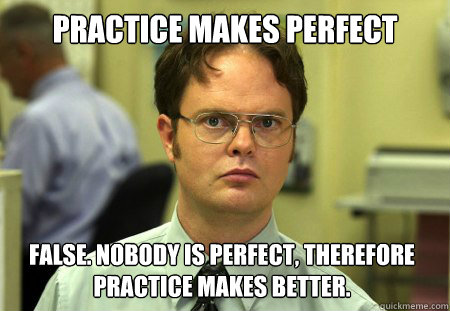

For these exercises we are going to use a new dataset, the 2016 US Primary elections (`primary_results.csv` in our data folder). Start by importing pandas and reading in our data:

In [38]:
df = pd.read_csv("data/primary_results.csv")
df

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078
...,...,...,...,...,...,...,...,...
24606,Wyoming,WY,Teton-Sublette,95600028.0,Republican,Ted Cruz,0,0.000
24607,Wyoming,WY,Uinta-Lincoln,95600027.0,Republican,Donald Trump,0,0.000
24608,Wyoming,WY,Uinta-Lincoln,95600027.0,Republican,John Kasich,0,0.000
24609,Wyoming,WY,Uinta-Lincoln,95600027.0,Republican,Marco Rubio,0,0.000


The dataset has the following columns:

- *state*
- *state_abbreviation* 
- *county* 
- *fips* county identifier
- *party* 
- *candidate* 
- *votes* votes the candidate got in the county
- *fraction_votes* percentage of the total county votes the candidate got

For each problem - think about how you would work this out first. Talk yourself through each step (or even jot it down) and then code it.

### <font color='#eb3483'> Exercise 1 </font>
Overall, which percentage of votes did every party get?

In [82]:
total_votes = df[["party", "votes"]].groupby(['party']).sum().votes.sum()

votes_by_party = df[["party", "votes"]].groupby(['party']).sum()

(votes_by_party.votes / total_votes)*100

party
Democrat      48.733082
Republican    51.266918
Name: votes, dtype: float64

### <font color='#eb3483'> Exercise 2 </font>

Who is the democrat candidate that got the most votes in Manhattan? and in the state of New York?

In [71]:
manhattan = df[(df['county'] == 'Manhattan') \
              & (df['party'] == 'Democrat')]
manhattan.sort_values(by = 'votes', ascending = False).loc[15012].candidate

'Hillary Clinton'

### <font color='#eb3483'> Exercise 3 </font>
How many votes did Donald Trump receive in Texas?

In [76]:
djt = df[(df['candidate'] == 'Donald Trump') \
              & (df['state'] == 'Texas')]
djt.votes.sum()

757618

### <font color='#eb3483'> Exercise 4 </font>

Let's consider democrat states those where the democrats got more votes and republican states those where the republican candidates got more votes. Which states are democrat and which republican?


*hint: one way to find out is by doing a pivot table using the sum as an aggregating function*

In [194]:
party_by_state = df.pivot_table(index="state", 
               columns='party', 
               values='votes',
               aggfunc='sum')
democrat_states = party_by_state[party_by_state.Democrat > party_by_state.Republican].reset_index()
print(democrat_states.state)

republican_states = party_by_state[party_by_state.Democrat < party_by_state.Republican].reset_index()
republican_states.state

0        California
1       Connecticut
2          Delaware
3            Hawaii
4          Illinois
5          Kentucky
6         Louisiana
7          Maryland
8     Massachusetts
9        New Jersey
10       New Mexico
11         New York
12           Oregon
13     Pennsylvania
14     Rhode Island
15          Vermont
16    West Virginia
Name: state, dtype: object


0            Alabama
1             Alaska
2            Arizona
3           Arkansas
4            Florida
5            Georgia
6              Idaho
7            Indiana
8               Iowa
9             Kansas
10          Michigan
11       Mississippi
12          Missouri
13           Montana
14          Nebraska
15            Nevada
16     New Hampshire
17    North Carolina
18              Ohio
19          Oklahoma
20    South Carolina
21      South Dakota
22         Tennessee
23             Texas
24              Utah
25          Virginia
26        Washington
27         Wisconsin
28           Wyoming
Name: state, dtype: object

### <font color='#eb3483'> Exercise 5 </font>

In how many of the republican states was Donald Trump the most voted republican candidate?

In [198]:
republican_states = df[(df['state'].isin(republican_states.state)) & (df['party'] == 'Republican')]
rep_votes_by_candidates = republican_states[['state', 'candidate', 'votes']].groupby(['state', 'candidate'], as_index=False).sum()
max_votes_by_states = rep_votes_by_candidates[['state', 'votes']].groupby('state').max()
winning_candidates = rep_votes_by_candidates[rep_votes_by_candidates.votes.isin(max_votes_by_states.votes)]
donald_dub = winning_candidates[winning_candidates.candidate == 'Donald Trump']
donald_dub.state

1             Alabama
10            Arizona
14           Arkansas
18            Florida
23            Georgia
31            Indiana
49           Michigan
53        Mississippi
57           Missouri
61            Montana
64           Nebraska
68             Nevada
75      New Hampshire
80     North Carolina
94     South Carolina
99       South Dakota
103         Tennessee
116          Virginia
120        Washington
Name: state, dtype: object